# The Goal here is to clean the data and analyze the dataset against life expectancy with linear regressions and visualizations

What is the impact on time on the life expectancy?

What is the impact of schooling on life expectancy?

How does Infant and Adult mortality rates affect life expectancy?

Do densely populated countries tend to have lower life expectancy?

What is the impact of GDP and income onn life expectancy?

Does Life Expectancy have positive or negative relationship with drinking alcohol?

Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, alcohol?

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Viewing data

In [33]:
dataset = pd.read_csv('Life Expectancy Data.csv')

In [34]:
dataset.shape

(2938, 22)

In [35]:
# viewing columns and their data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Cleaning data

In [36]:
# removing the spaces to the right and left of the column names

dataset.columns = dataset.columns.str.rstrip() 
dataset.columns = dataset.columns.str.lstrip() 

In [37]:
# replacing remaining spaces in columns with under_bar

dataset.columns = dataset.columns.str.replace(' ', '_')

# replacing dashes in columns with under_bar
dataset.columns = dataset.columns.str.replace('-', '_')

In [38]:
# changing column headers to lowercase
dataset.columns = map(str.lower, dataset.columns)

In [39]:
# Checking the new format of the column names

dataset.columns.to_list()

['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness__1_19_years',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling']

### Inspecting Null Values

In [40]:
# checking for null value counts
dataset.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [41]:
# checking for null value percentages
dataset.isnull().sum()/len(dataset)*100

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmi                                 1.157250
under_five_deaths                   0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness__1_19_years                1.157250
thinness_5_9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

<AxesSubplot:>

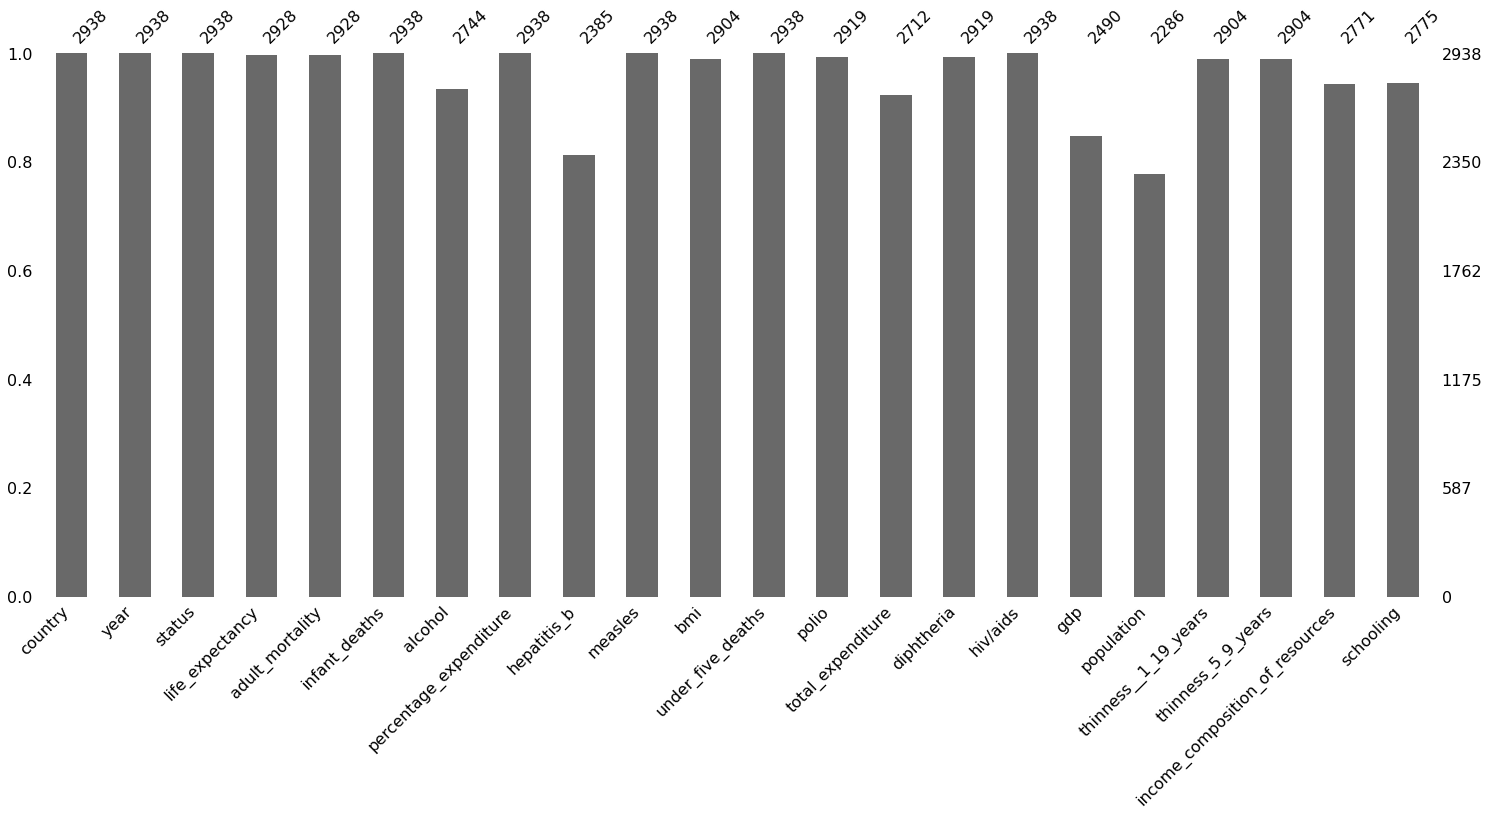

In [42]:
# visualizaing the na values

import missingno as msno
msno.bar(dataset)

### Since I'm largely basing this anlysis on Life expectancy, I want to ensure that only countries with sufficient life expectancy data remains in the data set.

#### Identifying countries that dont appear enough. Every country in the list should optimally have 16 occurences  for each of the 16 years in this dataset. The countries below only appear once in the entire dataset - representing one year of data. they will be removed

In [19]:
dx = dataset.value_counts('country').sort_values(0).reset_index().head(20)
dx = dx.country[:10].tolist()
dx

['Dominica',
 'San Marino',
 'Cook Islands',
 'Marshall Islands',
 'Tuvalu',
 'Saint Kitts and Nevis',
 'Palau',
 'Niue',
 'Nauru',
 'Monaco']

In [46]:
# removing countries from the  dataset using list in the previously created variable dx
dataset = dataset[dataset.country.isin(dx) == False]

In [48]:
# confirming that countries in the dx variable are gone

dataset.value_counts('country').sort_values(0).reset_index().head(5)

# ordered from least to greatest and checking the first 5 values

country   0
0          Afghanistan  16
1             Botswana  16
2              Algeria  16
3               Angola  16
4  Antigua and Barbuda  16

In [92]:
#Filling NAs in each column with each country's average for that column

dataset["alcohol"] = dataset.groupby("country")['alcohol'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["hepatitis_b"] = dataset.groupby("country")['hepatitis_b'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["bmi"] = dataset.groupby("country")['bmi'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["polio"] = dataset.groupby("country")['polio'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["total_expenditure"] = dataset.groupby\
("country")['total_expenditure'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["diphtheria"] = dataset.groupby("country")['diphtheria'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["gdp"] = dataset.groupby("country")['gdp'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["population"] = dataset.groupby("country")['population'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["income_composition_of_resources"] = dataset.groupby\
("country")['income_composition_of_resources'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["schooling"] = dataset.groupby("country")['schooling'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["thinness__1_19_years"] = dataset.groupby\
("country")['thinness__1_19_years'].transform(lambda x: x.fillna(method = 'ffill').bfill())

dataset["thinness_5_9_years"] = dataset.groupby\
("country")['thinness_5_9_years'].transform(lambda x: x.fillna(method = 'ffill').bfill())

<AxesSubplot:>

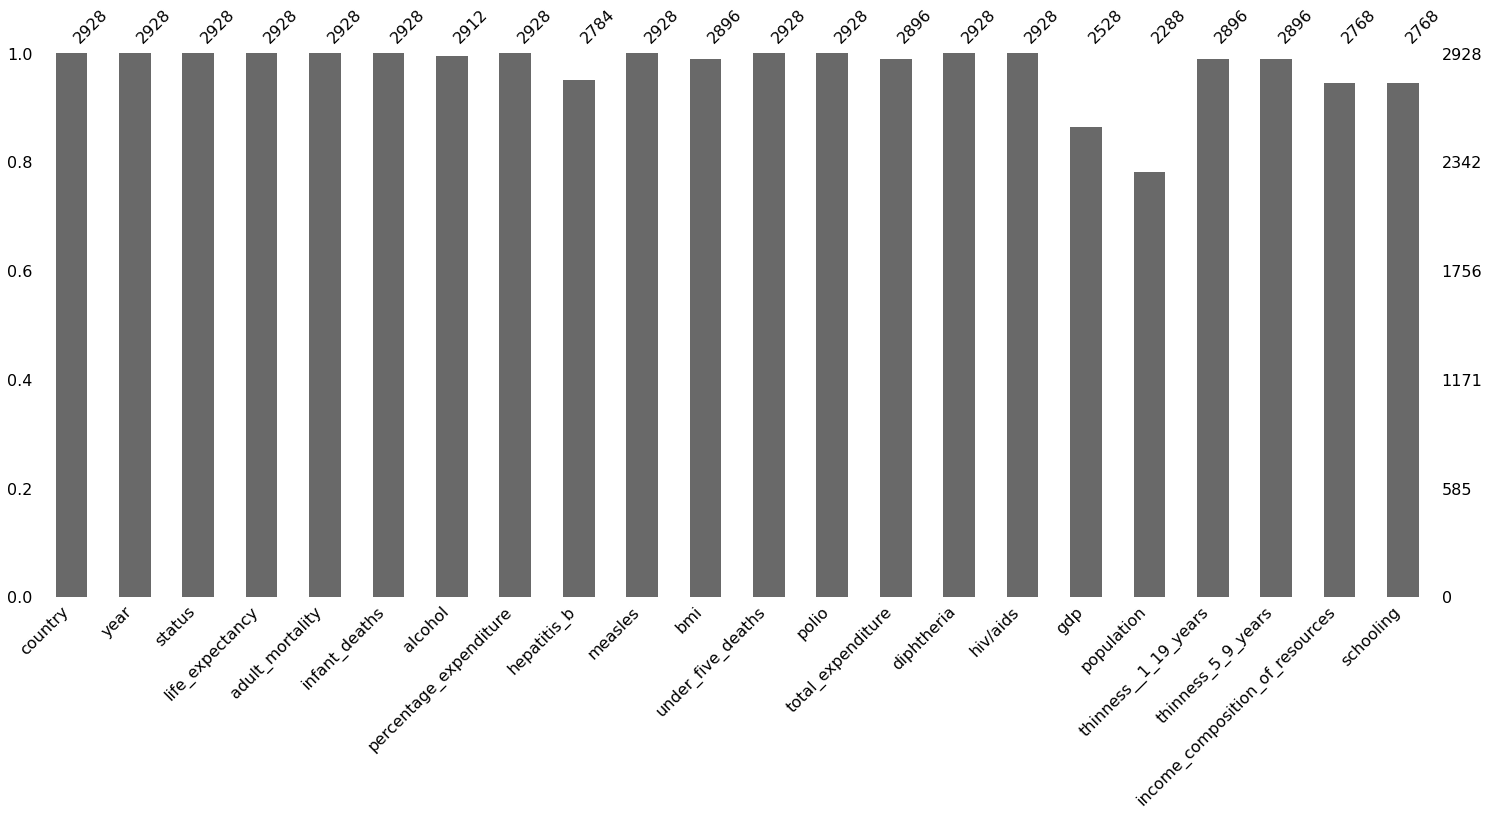

In [93]:
import missingno as msno
#checking null value counts again
msno.bar(dataset)

### there are still null values remaining. this tells me that the fill and back fill functions could not compute and there are countries missing all values in a column

In [97]:
# testing my thought - checking for countries with all null values in the gdp column, which still has NAs

#grouping by country and counting the null values
gdp_null = dataset.gdp.isnull().groupby(dataset['country']).sum().reset_index()

#locating countries with more than 1 null value for gdp
gdp_null = gdp_null.loc[gdp_null['gdp'] > 1]
gdp_null.count()

country    25
gdp        25
dtype: int64

### there are 25 countries with all null values in the gdp column. i will conditionally continue to address these types of null values whenever i may need to use the column.

## Checking for duplicated rows

In [29]:
dataset.duplicated().value_counts()

#there are no duplicated rows

False    2928
dtype: int64

# Viewing the distribution/correlations

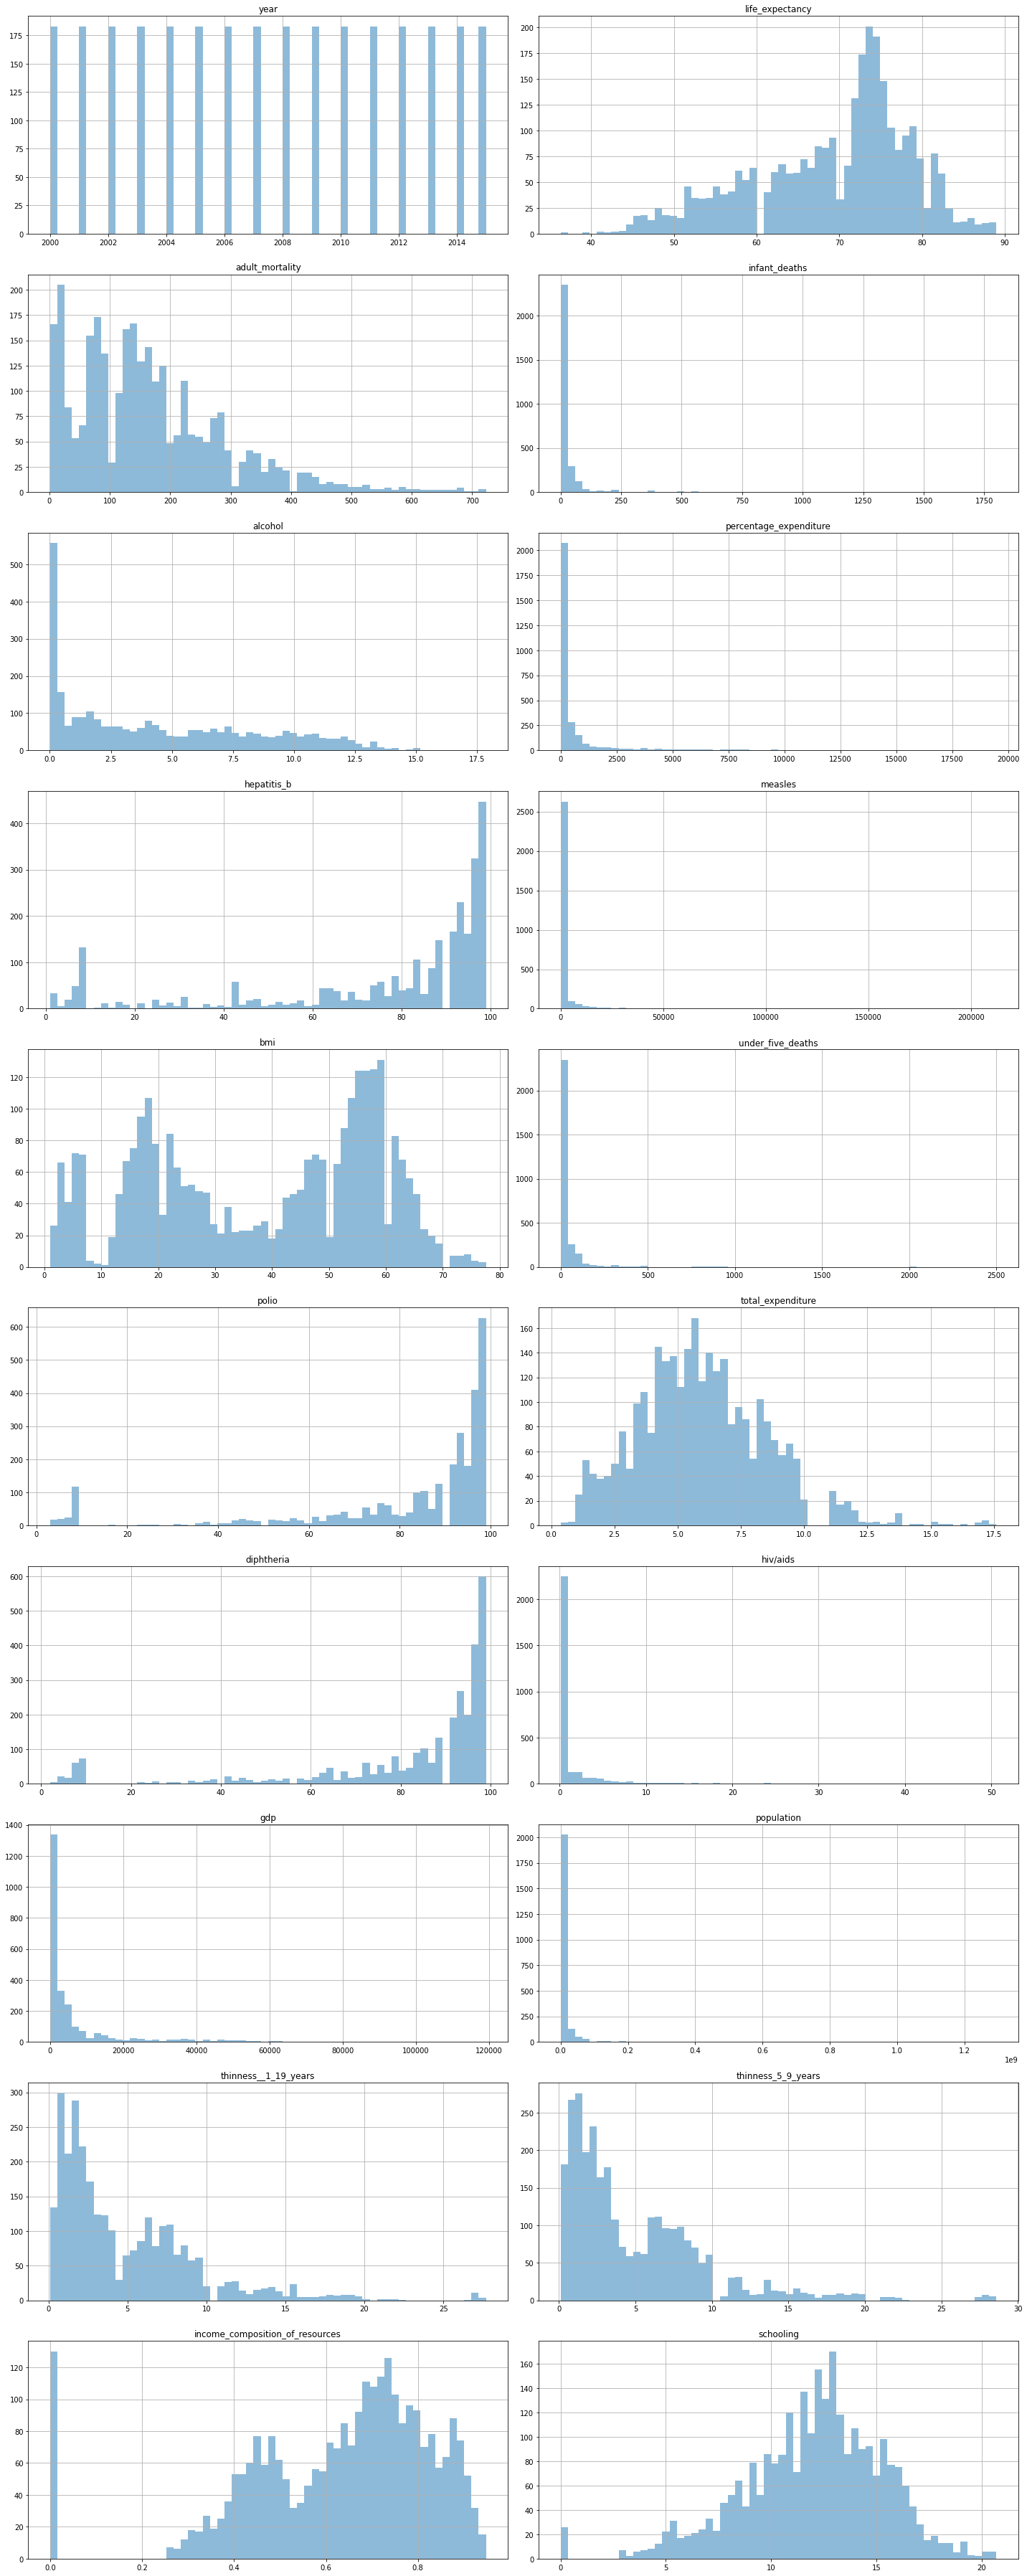

In [163]:
# Viewing distribution of all data

dataset.hist(alpha = .5, bins = 60, figsize = (20,50), layout=(10,2))
plt.tight_layout()
plt.show()

### There are some large differences between max and min in the distribution plots. I will allow these values to remain, as such data may be relevant as there are countries with both large and small populations in this dataset

<AxesSubplot:xlabel='status', ylabel='count'>

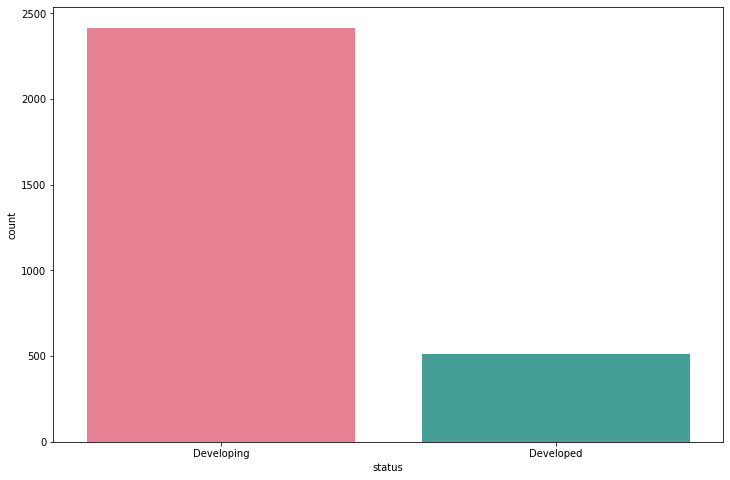

In [98]:
#counting the amount of developing and developed counties in the dataset
plt.figure(figsize=(12,8))
sns.countplot(data=dataset, x= 'status', order=dataset["status"].value_counts().index, palette= "husl")

In [43]:
# assessing the differences between developed and developing countries
dataset.groupby('status').mean().reset_index()

status    year  life_expectancy  adult_mortality  infant_deaths  \
0   Developed  2007.5        79.034583        80.700000       1.560417   
1  Developing  2007.5        67.151093       181.732955      37.169580   

    alcohol  percentage_expenditure  hepatitis_b      measles        bmi  ...  \
0  9.736278             2541.818216    88.142857   526.233333  51.785833  ...   
1  3.471286              323.211691    79.831601  2932.515297  35.222695  ...   

       polio  total_expenditure  diphtheria  hiv/aids           gdp  \
0  94.227083           7.605911   93.920833   0.10000  21116.529967   
1  80.183781           5.578839   79.878361   2.07771   4314.113522   

     population  thinness__1_19_years  thinness_5_9_years  \
0  6.938312e+06              1.328750            1.297708   
1  1.438205e+07              5.602527            5.649823   

   income_composition_of_resources  schooling  
0                         0.849692  15.707176  
1                         0.580430  11.226654  

[2 rows x 21 columns]

In [44]:
# generating numeric correlation plot
dataset.corr()

year  life_expectancy  adult_mortality  \
year                             1.000000         0.169406        -0.074542   
life_expectancy                  0.169406         1.000000        -0.687371   
adult_mortality                 -0.074542        -0.687371         1.000000   
infant_deaths                   -0.036556        -0.191792         0.075650   
alcohol                         -0.053745         0.403233        -0.198122   
percentage_expenditure           0.023318         0.374272        -0.238731   
hepatitis_b                      0.095568         0.255222        -0.163306   
measles                         -0.082442        -0.158621         0.030521   
bmi                              0.098401         0.562974        -0.381423   
under_five_deaths               -0.041958        -0.217217         0.090745   
polio                            0.086774         0.463768        -0.279767   
total_expenditure                0.082660         0.223197        -0.117697   
diphtheria                       0.127960         0.476761        -0.278253   
hiv/aids                        -0.134878        -0.561133         0.503134   
gdp                              0.091630         0.456969        -0.294251   
population                       0.014043        -0.023709        -0.011609   
thinness__1_19_years            -0.053969        -0.470872         0.290723   
thinness_5_9_years              -0.057732        -0.463512         0.291378   
income_composition_of_resources  0.239329         0.733049        -0.460137   
schooling                        0.207429         0.767413        -0.463242   

                                 infant_deaths   alcohol  \
year                                 -0.036556 -0.053745   
life_expectancy                      -0.191792  0.403233   
adult_mortality                       0.075650 -0.198122   
infant_deaths                         1.000000 -0.113457   
alcohol                              -0.113457  1.000000   
percentage_expenditure               -0.083539  0.319800   
hepatitis_b                          -0.225788  0.073507   
measles                               0.500866 -0.049897   
bmi                                  -0.224755  0.340037   
under_five_deaths                     0.996656 -0.110244   
polio                                -0.166251  0.217681   
total_expenditure                    -0.133116  0.321491   
diphtheria                           -0.169733  0.220163   
hiv/aids                              0.027882 -0.055715   
gdp                                  -0.106398  0.333127   
population                            0.557954 -0.035238   
thinness__1_19_years                  0.474059 -0.428269   
thinness_5_9_years                    0.478944 -0.417470   
income_composition_of_resources      -0.140303  0.451010   
schooling                            -0.194898  0.554082   

                                 percentage_expenditure  hepatitis_b  \
year                                           0.023318     0.095568   
life_expectancy                                0.374272     0.255222   
adult_mortality                               -0.238731    -0.163306   
infant_deaths                                 -0.083539    -0.225788   
alcohol                                        0.319800     0.073507   
percentage_expenditure                         1.000000     0.002451   
hepatitis_b                                    0.002451     1.000000   
measles                                       -0.055188    -0.121737   
bmi                                            0.222518     0.148426   
under_five_deaths                             -0.085663    -0.235503   
polio                                          0.147025     0.486138   
total_expenditure                              0.172501     0.071799   
diphtheria                                     0.142745     0.620732   
hiv/aids                                      -0.097895    -0.121420   
gdp                                 

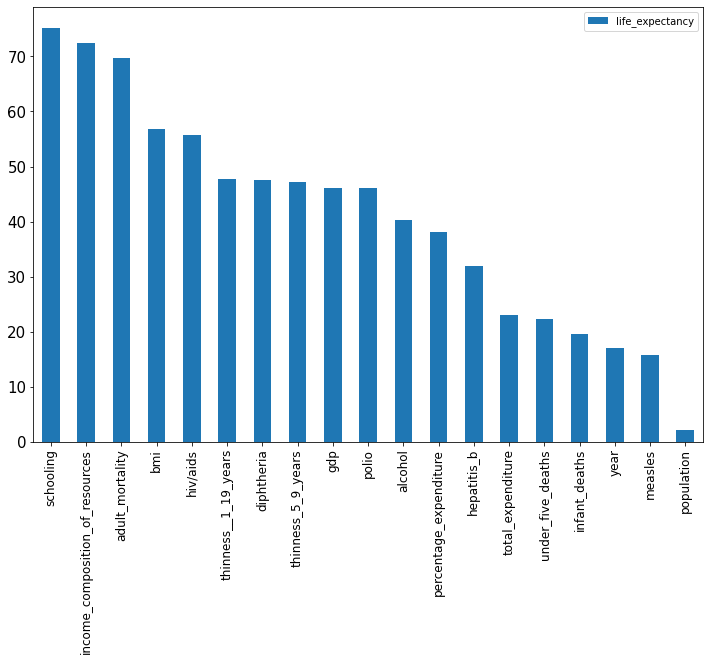

In [124]:
# plottiing the numerical correlation against life_expectancy into a bar chart
pd.DataFrame(abs(dataset.corr()['life_expectancy'].\
                 drop('life_expectancy')*100).sort_values(ascending=False)).plot.bar(figsize = (12,8))
plt.yticks(size = 15)
plt.xticks(size = 12)
plt.show()

### There are several columns that correlate with life expectancy in this dataset, according to the plot above

<AxesSubplot:>

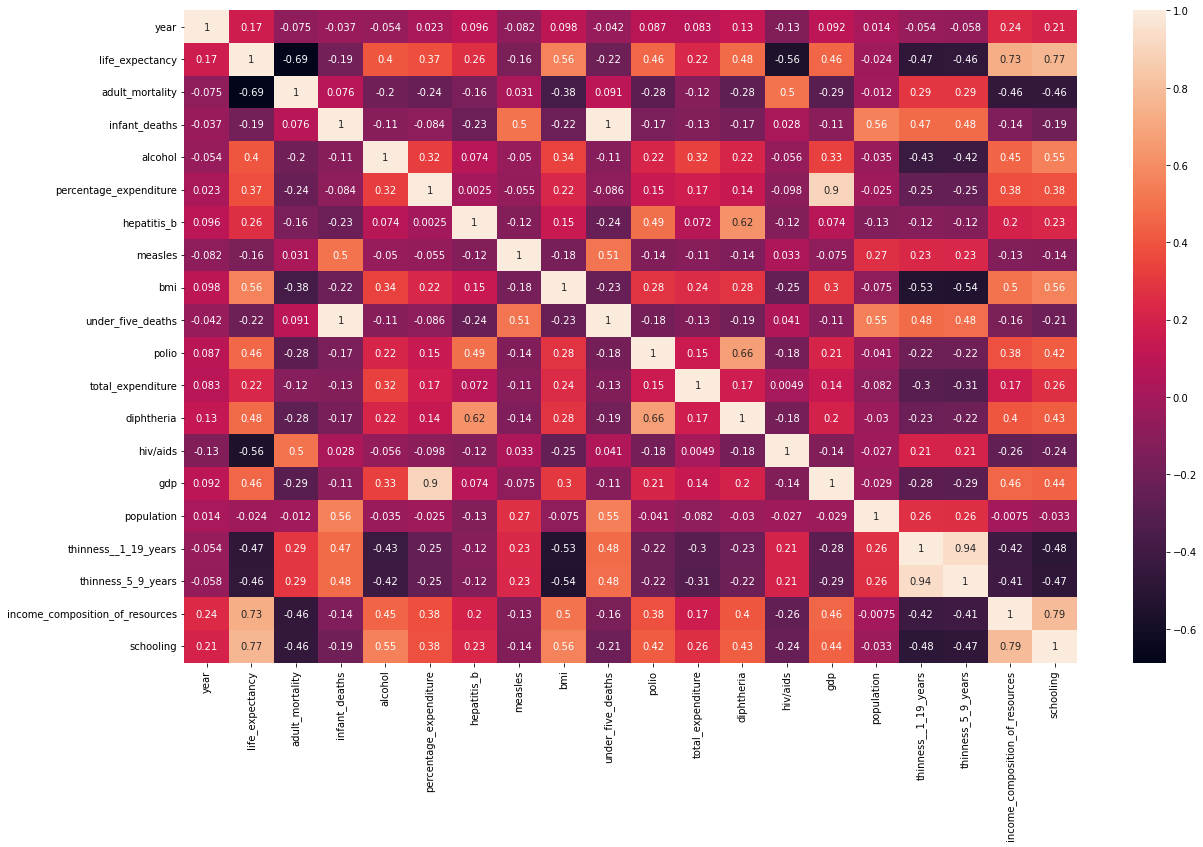

In [46]:
# generating correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr(),annot=True)

#### # plotting such a large number of correlations is not always SUPER useful.. but worth a look to note that there are many correlations here

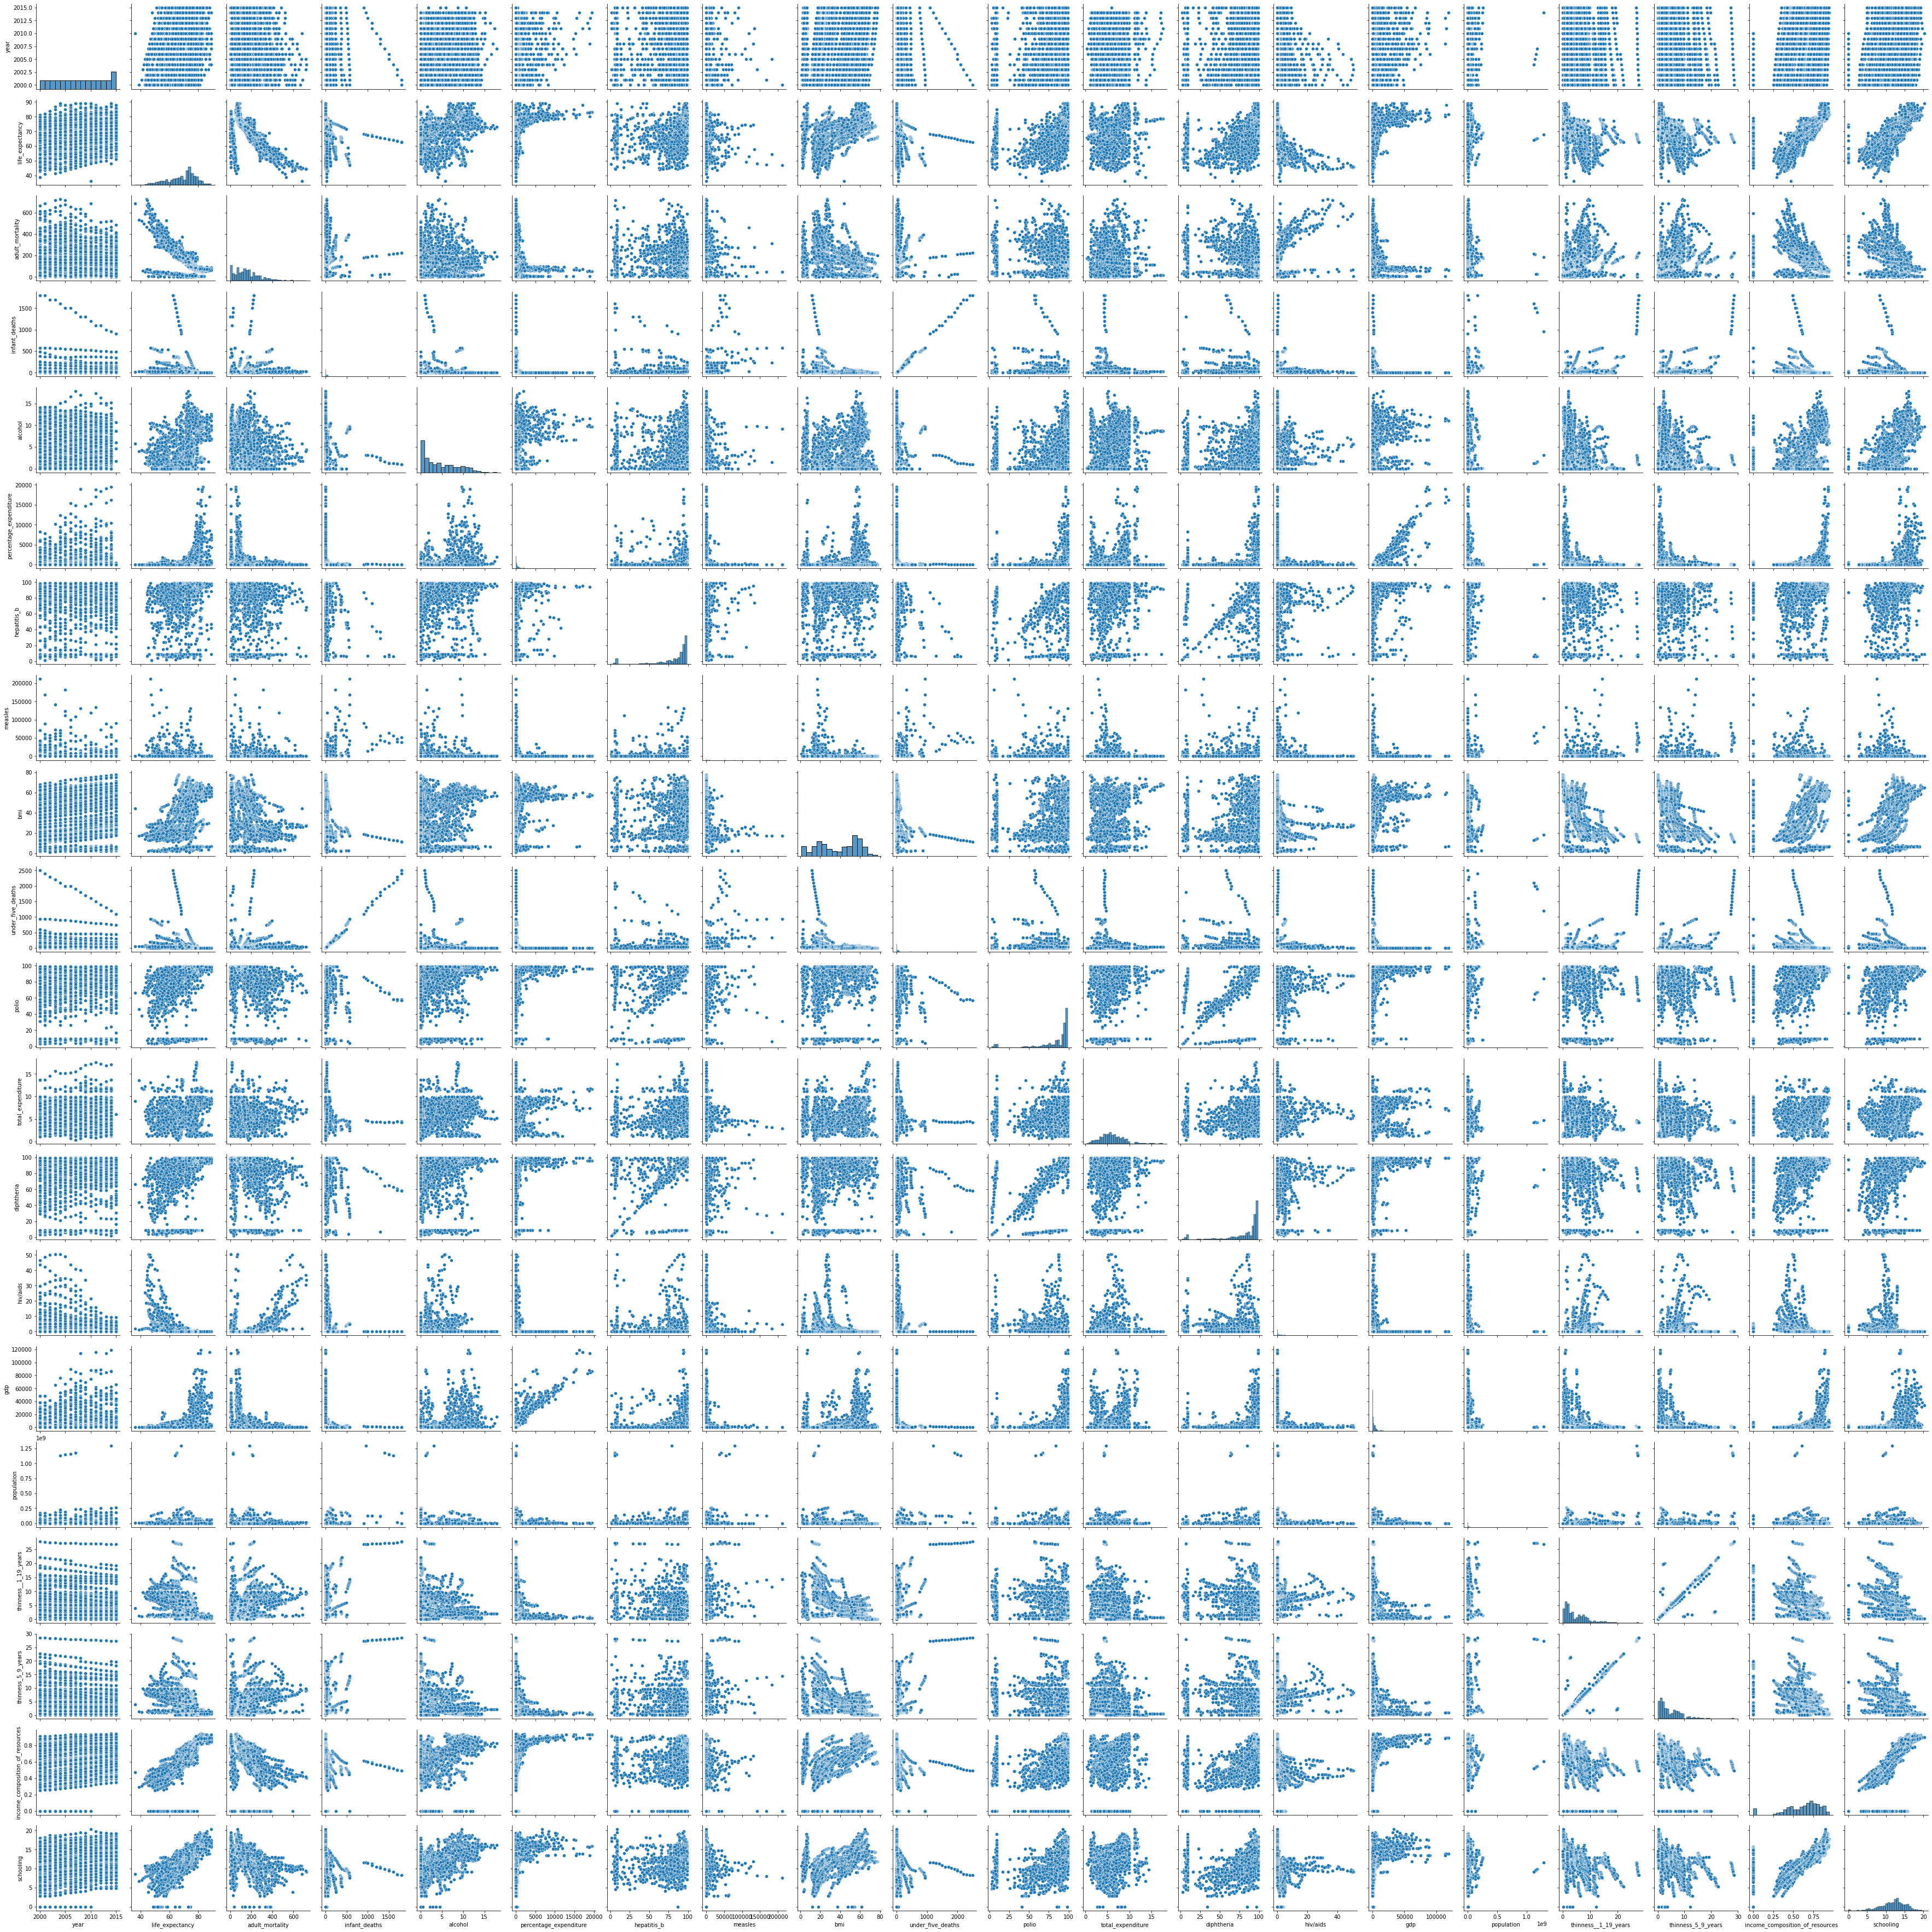

In [47]:
sns.pairplot(dataset)

#  What is the affect of time (in years) on life expectancy?

### The code in below will generate an interactive plot. Click on a single (or multiple) country name in the legend to display data. You can double-click the legend to display all data or remove all data

In [153]:
# adding list of countries ot a list
country = np.unique(dataset.country.tolist()).tolist()

# extract color palette into a list, the palette can be changed
pal = list(sns.color_palette(palette=('Set2'), n_colors=len(country)).as_hex())

fig = go.Figure()

# looping through each country in the dataset, and plotting eaach data point for each year
for d,p in zip(country, pal):
    fig.add_trace(go.Scatter(x = dataset[dataset['country']==d]['year'],
                             y = dataset[dataset['country']==d]['life_expectancy'],
                             #visible = 'legendonly',
                             name = d,
                             line_color = p, 
                             fill=None))  #tozeroy 

# The code in below will generate an interactive plot. You can double-click the legend to display 
#all data or remove all data click on a single (or multiple) country name in the legend to display data. 
fig.show()

### Generally, time (in the form of years) has had a positive impact in life expectancy across most countries.

In [49]:
# modeling life_expectancy and year below via linear regression

year_model = smf.ols(formula = 'life_expectancy ~ year',
               data = dataset).fit()
print(year_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     81.73
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           2.87e-19
Time:                        23:54:51   Log-Likelihood:                -10099.
No. Observations:                2768   AIC:                         2.020e+04
Df Residuals:                    2766   BIC:                         2.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.5207     76.960     -8.141      0.0

#### P value of above regression:

In [423]:
model.pvalues[0]

6.520411237564932e-17

###  The p-value for this linear regression is increadibly low. Meaning, that there is a very slim chance that the correlation between life expectancy and year is by coincidence. Thus, as countries grow older, it's citizens will live longer. However, only 2.9% of the life expectancy variance in this model is determined by years, according to the R-squared value. It would seem that humans are continuing to adapt to their unique environments, and thus finding more ways to protect themselves from the deteriments of their environments, on an individual/national level, and living longer over time

#  What is the affect of schooling on life expectancy?

### The code in below will generate an interactive plot. Click on a single (or multiple) country name in the legend to display data. You can double-click the legend to display all data or remove all data

In [127]:
px.scatter(dataset, x='life_expectancy',y='schooling',color='country',
           size = 'year',title='Life Expectancy and Schooling')

### This visualization expresses that an inscreased amount of schooling dramatically increases life expectancy. Increased education raises standard of living, a healthy conscious, more income/access to health care, and much more.

In [129]:
# modeling life_expectancy and population below via linear regression

schooling_model = smf.ols(formula = 'life_expectancy ~ schooling',
               data = dataset).fit()
print(schooling_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     3599.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:46:56   Log-Likelihood:                -8964.3
No. Observations:                2768   AIC:                         1.793e+04
Df Residuals:                    2766   BIC:                         1.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.1089      0.437    100.992      0.0

### 56% of the variance in life expectancy in this model is explained by schooling. Schooling has a positive correlation coefficient of 43% with gdp, and 43% with income. Schooling, in general, is linked to better outcomes

# Predict schooling and based on life expectancy

In [130]:
#creating new dataset without the NAs in schooling.

prediction_data = dataset[['life_expectancy', 'schooling']].dropna()

# Test train split for supervised learning
X_train, X_test, y_train, y_test = train_test_split(prediction_data.life_expectancy, prediction_data.schooling)

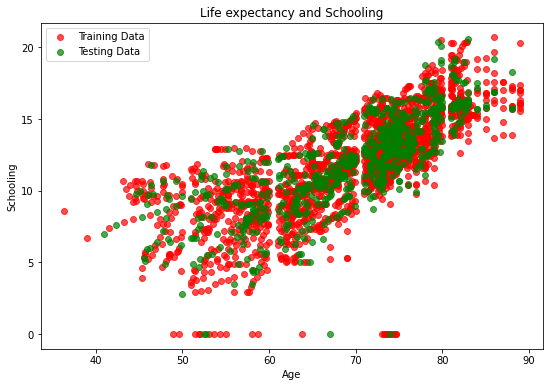

In [131]:
# Test Train split visualization
plt.figure(figsize=(9,6))
plt.scatter(X_train, y_train, label = 'Training Data',color ='r', alpha =.7)
plt.scatter(X_test, y_test, label = 'Testing Data', color ='g', alpha =.7)
plt.legend()
plt.title('Life expectancy and Schooling')
plt.xlabel('Age')
plt.ylabel('Schooling')
plt.show()

In [132]:
# create linear model and train it
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

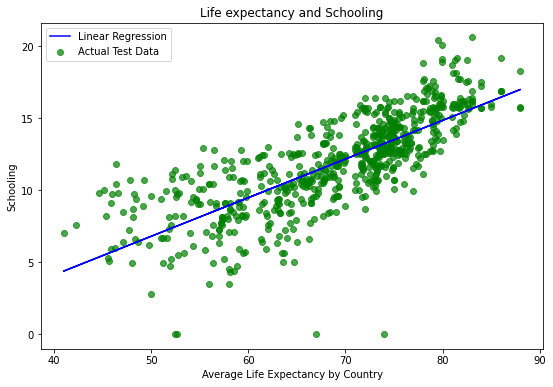

In [133]:
# Use model to predict on test data
prediction = LR.predict(X_test.values.reshape(-1,1))

#polt prediction line against actual test data
plt.figure(figsize=(9,6))
plt.plot(X_test, prediction, label = 'Linear Regression', color = 'b')
plt.scatter(X_test, y_test, label = 'Actual Test Data',color= 'g',alpha= .7)
plt.title('Life expectancy and Schooling')
plt.xlabel('Average Life Expectancy by Country')
plt.ylabel('Schooling')
plt.legend()
plt.show()

# Predict the schooling level of country based on a life expectancy of 55

In [151]:
# putting age 55 into the prediction. The output if the school level (in years of schooling)

print('A country with a life expectancy of 55 is predicted to experience about',
      round(LR.predict([[55]])[0],2), 'years of schooling')


A country with a life expectancy of 55 is predicted to experience about 8.13 years of schooling


#  What is the affect of adult mortality on life expectancy?

### The code in below will generate an interactive plot. Click on a single (or multiple) country name in the legend to display data. You can double-click the legend to display all data or remove all data

In [152]:
px.scatter(dataset, x='life_expectancy',y='adult_mortality',color='country',
           size = 'year',title='Life Expectancy and Adult Mortality')

### The plot above displays the sentiment that, the lower the adult mortality, the higher the life expectancy

In [155]:
# modeling life_expectancy and adult_mortality below via linear regression

adult_model = smf.ols(formula = 'life_expectancy ~ adult_mortality',
               data = dataset).fit()
print(adult_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     2755.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:57:01   Log-Likelihood:                -9782.0
No. Observations:                2928   AIC:                         1.957e+04
Df Residuals:                    2926   BIC:                         1.958e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          78.0182      0.210    3

### Only 48.5% of the variance of life expectancy in this model is explained by adult mortality, according to the R-Sqaured value. With a very low p-value, the results are significant. the relationship is very clear, the less deaths, the older the population grows. This ties into the previously noted relationship between life expectancy and years, where, naturally, nations will live longer as the years go on, but death is an inhibitor of the growth of average age

#  What is the affect of infant deaths on life expectancy?

### The code in below will generate an interactive plot. Click on a single (or multiple) country name in the legend to display data. You can double-click the legend to display all data or remove all data

In [156]:
px.scatter(dataset, x='life_expectancy',y='infant_deaths',color='country',
           size = 'year',title='Life Expectancy and Infant Deaths')

In [498]:
# modeling life_expectancy and infant_deaths below via linear regression

infant_deaths_model = smf.ols(formula = 'life_expectancy ~ infant_deaths',
               data = dataset).fit()
print(infant_deaths_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     117.6
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           6.88e-27
Time:                        16:48:32   Log-Likelihood:                -10696.
No. Observations:                2928   AIC:                         2.140e+04
Df Residuals:                    2926   BIC:                         2.141e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        69.7069      0.178    391.102

### with a R squared value of only .039, infant deaths only explain 3.9% of the variance in life_expectancy. Infants range from ages 0-1 years old. Theres much more to the world's life expactancy results than the results infant deaths, a small population in any nation. However, with a very low p-value, the results are significant. 

# What is the affect of population on life expectancy?

In [157]:
# modeling life_expectancy and population below via linear regression

pop_model = smf.ols(formula = 'life_expectancy ~ population',
               data = dataset).fit()
print(pop_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.045
Date:                Thu, 29 Dec 2022   Prob (F-statistic):              0.307
Time:                        21:59:01   Log-Likelihood:                -8472.5
No. Observations:                2288   AIC:                         1.695e+04
Df Residuals:                    2286   BIC:                         1.696e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7216      0.210    327.628      0.0

### With a r-squared value of 0, 0% of variance in life expectancy is explained by population in this linear model. This outcome is also on par with the previous correlation plots. Life expectancy has a -0.04 relationship with population. More or less people in a nation does not increase or decrease life expectancy

#  What is the affect of income on life expectancy?

### The code in below will generate an interactive plot. Click on a single (or multiple) country name in the legend to display data. You can double-click the legend to display all data or remove all data

In [158]:
px.scatter(dataset, x='life_expectancy',y='income_composition_of_resources',color='country',
           size = 'year',title='Life Expectancy and Income')

### Income has a very strong correlation with life expectancy, according to the visual above

In [159]:
# modeling life_expectancy and income below via linear regression

income_model = smf.ols(formula = 'life_expectancy ~ income_composition_of_resources',
               data = dataset).fit()
print(income_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     3061.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:01:29   Log-Likelihood:                -9086.7
No. Observations:                2768   AIC:                         1.818e+04
Df Residuals:                    2766   BIC:                         1.819e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### 52% of the variance of life expectancy in this model is explained by income. More income provides access to better standards of living, schooling, a larger network, health care, less financial stress

#  What is the affect of GDP on life expectancy?

### The code in below will generate an interactive plot. Click on a single (or multiple) country name in the legend to display data. You can double-click the legend to display all data or remove all data

In [160]:
px.scatter(dataset, x='life_expectancy',y='gdp',color='country',
           size = 'year',title='Life Expectancy and GDP')

### Visualized above - as life expectancy gets higher, so does the gdp. 

In [519]:
# modeling life_expectancy and income below via linear regression

gdp_model = smf.ols(formula = 'life_expectancy ~ gdp',
               data = dataset).fit()
print(gdp_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     685.2
Date:                Wed, 28 Dec 2022   Prob (F-statistic):          7.61e-134
Time:                        18:22:35   Log-Likelihood:                -9025.6
No. Observations:                2528   AIC:                         1.806e+04
Df Residuals:                    2526   BIC:                         1.807e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.8907      0.193    346.835      0.0

### 21% of the variance of life expectancy in the model is explained by the gdp. a country with higher gdp must be relative to a country with a higher income - thus, it's citizens have better standards of living, better food, and access to health care and schooling. There are many other factors at play alongside the gdp

#  What is the affect of Alcohol on life expectancy?

### The code in below will generate an interactive plot. Click on a single (or multiple) country name in the legend to display data. You can double-click the legend to display all data or remove all data

In [162]:
px.scatter(dataset, x='life_expectancy',y='alcohol',color='country',
           size = 'year',title='Life Expectancy and Alcohol')

### There appears to be a positive correlation between life expectancy and alcohol. There is correlation coefficient of 39% between the two

In [520]:
# modeling life_expectancy and income below via linear regression

alcohol_model = smf.ols(formula = 'life_expectancy ~ alcohol',
               data = dataset).fit()
print(alcohol_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     580.9
Date:                Wed, 28 Dec 2022   Prob (F-statistic):          3.56e-117
Time:                        18:24:32   Log-Likelihood:                -10416.
No. Observations:                2912   AIC:                         2.084e+04
Df Residuals:                    2910   BIC:                         2.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.8919      0.244    266.421      0.0

### 16% of the variance in life expectancy in this model is explained by alcohol consumption. Could it be that, being able to afford alochol correlates with income? The answer is Yes. There is a positive correlation between a country's alcohol consumption and income with a correlation coefficient of 42%. Those who have the luxury of affording alcohol,  are more likely to have higher income and higher standard or living, appearantly

### Overall, an increase in GDP, schooling, income, adulty mortality and time (in the form of years) are some of the pillars that correlate positively with life expectancy. These pillars, in short, allow folks to live a life of higher quantity (maybe quality, as well), with access to health care, knowledge of health care, and even access to more alcohol!